Michael Eng

# Part 1

1 CNNs reduce the parameter size of the image by applying filters before the fully connected layer. This greatly reduces computational cost. In addition, it means that the same pattern in different locations are easier to classify as the same pattern.

2 Convolutional layers do not reduce the size of the input by a lot. It only applies a filter, however, max pooling will reduce the image by a considerable fraction of the input.

3 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import utils
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from tensorflow.keras.layers import LeakyReLU 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

np.random.seed(25)

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


Text(0.5, 1.0, 'Class 5')

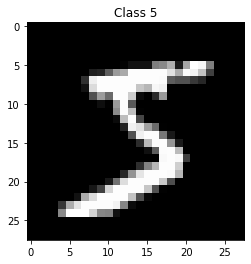

In [5]:
plt.imshow(X_train[0], cmap='gray')
plt.title('Class '+ str(y_train[0]))

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape

(60000, 28, 28, 1)

In [7]:
number_of_classes = 10

Y_train = utils.to_categorical(y_train, number_of_classes)
Y_test = utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [8]:
# Three steps to Convolution
# 1. Convolution
# 2. Activation
# 3. Pooling
# Repeat Steps 1,2,3 for adding more hidden layers

# 4. After that make a fully connected network
# This fully connected network gives ability to the CNN
# to classify the samples

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))

# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 10, 10, 64)        0

In [10]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [11]:
gen = ImageDataGenerator(
    rotation_range=8, 
    width_shift_range=0.08, 
    shear_range=0.3,
    height_shift_range=0.08, 
    zoom_range=0.08)

test_gen = ImageDataGenerator()

In [12]:
train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)

In [13]:
# model.fit(X_train, Y_train, batch_size=128, nb_epoch=1, validation_data=(X_test, Y_test))

train_score = model.fit_generator(
    train_generator, 
    steps_per_epoch=60000//64, 
    epochs=5, 
    validation_data=test_generator, 
    validation_steps=10000//64)

Epoch 1/5


/home/mike/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


937/937 [==============================] - 28s 30ms/step - loss: 0.4412 - accuracy: 0.8559 - val_loss: 0.0327 - val_accuracy: 0.9879
Epoch 2/5
937/937 [==============================] - 27s 29ms/step - loss: 0.0658 - accuracy: 0.9793 - val_loss: 0.0241 - val_accuracy: 0.9921
Epoch 3/5
937/937 [==============================] - 27s 29ms/step - loss: 0.0512 - accuracy: 0.9849 - val_loss: 0.0245 - val_accuracy: 0.9925
Epoch 4/5
937/937 [==============================] - 27s 29ms/step - loss: 0.0413 - accuracy: 0.9879 - val_loss: 0.0165 - val_accuracy: 0.9937
Epoch 5/5
937/937 [==============================] - 28s 30ms/step - loss: 0.0347 - accuracy: 0.9887 - val_loss: 0.0174 - val_accuracy: 0.9935


In [14]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0174 - accuracy: 0.9935

Test accuracy:  0.9934999942779541


In [15]:
predictions = model.predict_classes(X_test)

predictions = list(predictions)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
sub.to_csv('./output_cnn.csv', index=False)

/home/mike/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [16]:
print(train_score.history['accuracy'])
print(score[1])


[0.9375667572021484, 0.981029748916626, 0.9855512380599976, 0.9884543418884277, 0.9889048337936401]
0.9934999942779541


# Part 2

In [21]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


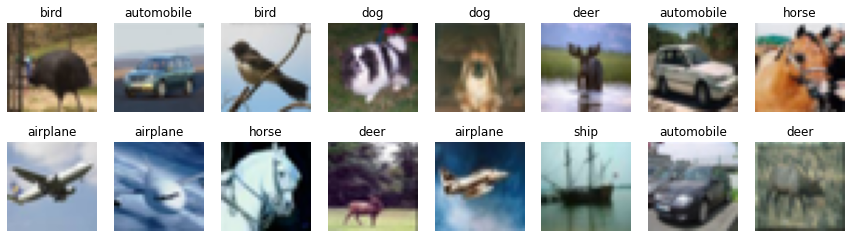

In [22]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer",  "dog", "frog", "horse", "ship", "truck"]

# show random images from train
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()


In [23]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train/=255
x_test/=255

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)
train_score = []

In [24]:
# ImageDataGenerators take jpeg files and transform them into tensors. Uses arguments to do data aquisition

gen = ImageDataGenerator(
    rotation_range=8, 
    width_shift_range=0.08, 
    shear_range=0.3,
    height_shift_range=0.08, 
    zoom_range=0.08)

test_gen = ImageDataGenerator()

In [25]:
train_generator = gen.flow(x_train, y_train, batch_size=64)
test_generator = test_gen.flow(x_test, y_test, batch_size=64)

In [75]:
# import necessary building blocks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, LeakyReLU

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(32,32,3))) # i: 32x32, o: 30x30
model.add(LeakyReLU())
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3))) # i: 30x30, o: 28x28
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2,2))) # i: 28x28, o: 14x14

BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3))) # i: 14x14 o:12x12
model.add(LeakyReLU())
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3))) # i: 12x12 o: 10x10
model.add(LeakyReLU())
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3))) # i: 10x10 o: 8x8
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2,2))) # i: 8x8 o: 4x4

model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(1024))
model.add(LeakyReLU())
BatchNormalization()
model.add(Dense(10))

# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

In [76]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 12, 12, 64)      

In [77]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [78]:
# model.fit(X_train, Y_train, batch_size=128, nb_epoch=1, validation_data=(X_test, Y_test))
# using fit_generator to load images from hard drive to memory

train_score.append(model.fit_generator(
    train_generator, 
    steps_per_epoch=50000//64, 
    epochs=10 , 
    validation_data=test_generator, 
    validation_steps=10000//64))

/home/mike/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
781/781 [==============================] - 38s 48ms/step - loss: 1.7043 - accuracy: 0.3737 - val_loss: 1.1460 - val_accuracy: 0.5903
Epoch 2/10
781/781 [==============================] - 36s 45ms/step - loss: 1.1734 - accuracy: 0.5807 - val_loss: 1.0211 - val_accuracy: 0.6495
Epoch 3/10
781/781 [==============================] - 35s 45ms/step - loss: 0.9931 - accuracy: 0.6493 - val_loss: 0.9348 - val_accuracy: 0.6915
Epoch 4/10
781/781 [==============================] - 36s 46ms/step - loss: 0.9372 - accuracy: 0.6708 - val_loss: 0.8644 - val_accuracy: 0.7045
Epoch 5/10
781/781 [==============================] - 36s 46ms/step - loss: 0.8575 - accuracy: 0.6989 - val_loss: 0.8356 - val_accuracy: 0.7191
Epoch 6/10
781/781 [==============================] - 35s 45ms/step - loss: 0.8372 - accuracy: 0.7054 - val_loss: 0.7858 - val_accuracy: 0.7359
Epoch 7/10
781/781 [==============================] - 35s 45ms/step - loss: 0.7986 - accuracy: 0.7207 - val_loss: 0.7880 - val_accuracy:

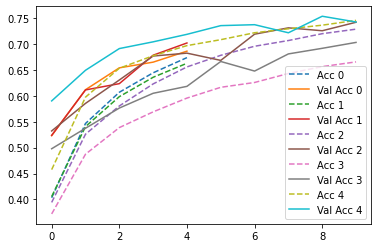

In [79]:
import matplotlib.pyplot as plt

descriptions = [
    '5 Epoch, 0.2 Dropout before last fc layer, 32-64 filters',
    '5 Epochs, 0.4 Dropout before first fc layer, 32-64 filters',
    '10 Epochs, 0.4 Dropout before first fc layer, 32-64 filters',
    '10 Epochs, 0.4 Dropout before first fc layer, 16-32 filters',
    '10 Epochs, 0.2 Dropout before first fc layer, 32-64 filters, leaky relu'
]

for i, mod in enumerate(train_score):
    plt.plot([i for i in range(len(mod.history['accuracy']))], mod.history['accuracy'], '--', label=str('Acc %d' %(i)))
    plt.plot([i for i in range(len(mod.history['val_accuracy']))], mod.history['val_accuracy'], label=str('Val Acc %d' %(i)))
plt.legend()
plt.show()

Looking at the graph, the parameters producing the best result is the last model containing 10 epochs, a dropout rate of 0.2 before the first fully connected layer and containing 32 filters in the first block of convolutions and 64 filters in the second block of convolutions. Leaky ReLU was also used as the activation function. The validation and training accuracies converge indicating that it is not overfitted.